In [1]:
# If you want to run this outside of the constant-ph-utils directory, uncomment the following lines
import sys
## caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'constant-ph-utils/')

from analyses import *
from plot import *
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Import lamdareference.dat
import pandas as pd

lambda_ref = pd.read_csv('test/lambdareference.dat', sep='\s+')

coord2lambda_dict = parse_lambda_reference('test/lambdareference.dat')

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1164770/2448173717.py:4: SyntaxWarning: invalid escape sequence '\s'
  lambda_ref = pd.read_csv('test/lambdareference.dat', sep='\s+')


In [3]:
RUN_TYPE = "Publication" # Debug or Publication
PLOT_TYPE = "Debug" # Debug or Publication
NPZ_OUTPUT = False # True or False

# Path variables
LAMBDAREF_PATH = "."
PATH_MD1 = "test/MD1/analysis"
PATH_MD2 = "test/MD1_2/analysis"
PATHS_MD = [PATH_MD1, PATH_MD2]
MD1_PREFIX = "MD1"
MD2_PREFIX = "MD1_2"

lambda_ref = pd.read_csv(os.path.join(LAMBDAREF_PATH ,'test/lambdareference.dat'), sep=r'\s+', engine='python')

if lambda_ref['chain'][0].endswith("xvg"):
    lambda_ref = lambda_ref.rename(columns={"chain": "coordinateFile", "coordinateFile": "chain"})

coord2lambda_dict = parse_lambda_reference(os.path.join(LAMBDAREF_PATH ,'test/lambdareference.dat'))

# Create an instance of XVGData for the directories
xvg_data_md1 = XVGData(PATH_MD1, num_rows = 2000000, num_threads = 2)
xvg_data_md2 = XVGData(PATH_MD2, num_rows = 2000000, num_threads = 2)
time_MD1 = xvg_data_md1[1][-1,0]  # Get last time of MD1

if RUN_TYPE == "Publication":
    time_MD2 = xvg_data_md2[1][-1,0]  # Get last time of MD2
    time_MDs = min(time_MD1, time_MD2)

test/MD1/analysis/cphmd-coord-1.xvg
test/MD1/analysis/cphmd-coord-2.xvg
test/MD1/analysis/cphmd-coord-3.xvg
test/MD1/analysis/cphmd-coord-4.xvg
test/MD1/analysis/cphmd-coord-5.xvg
test/MD1/analysis/cphmd-coord-6.xvg
test/MD1/analysis/cphmd-coord-7.xvg
test/MD1/analysis/cphmd-coord-8.xvg
test/MD1/analysis/cphmd-coord-9.xvg
test/MD1/analysis/cphmd-coord-10.xvg
test/MD1/analysis/cphmd-coord-11.xvg
test/MD1/analysis/cphmd-coord-12.xvg
test/MD1/analysis/cphmd-coord-13.xvg
test/MD1/analysis/cphmd-coord-14.xvg
test/MD1/analysis/cphmd-coord-15.xvg
test/MD1/analysis/cphmd-coord-16.xvg
test/MD1/analysis/cphmd-coord-17.xvg
test/MD1/analysis/cphmd-coord-18.xvg
test/MD1/analysis/cphmd-coord-19.xvg
test/MD1/analysis/cphmd-coord-20.xvg
test/MD1/analysis/cphmd-coord-21.xvg
test/MD1/analysis/cphmd-coord-22.xvg
test/MD1/analysis/cphmd-coord-23.xvg
test/MD1/analysis/cphmd-coord-24.xvg
test/MD1/analysis/cphmd-coord-25.xvg
test/MD1/analysis/cphmd-coord-26.xvg
test/MD1/analysis/cphmd-coord-27.xvg
test/MD1/a

# MD1 

In [4]:
PATH_ANALYSIS = "test/MD1/analysis"

## Overview lambda distributions

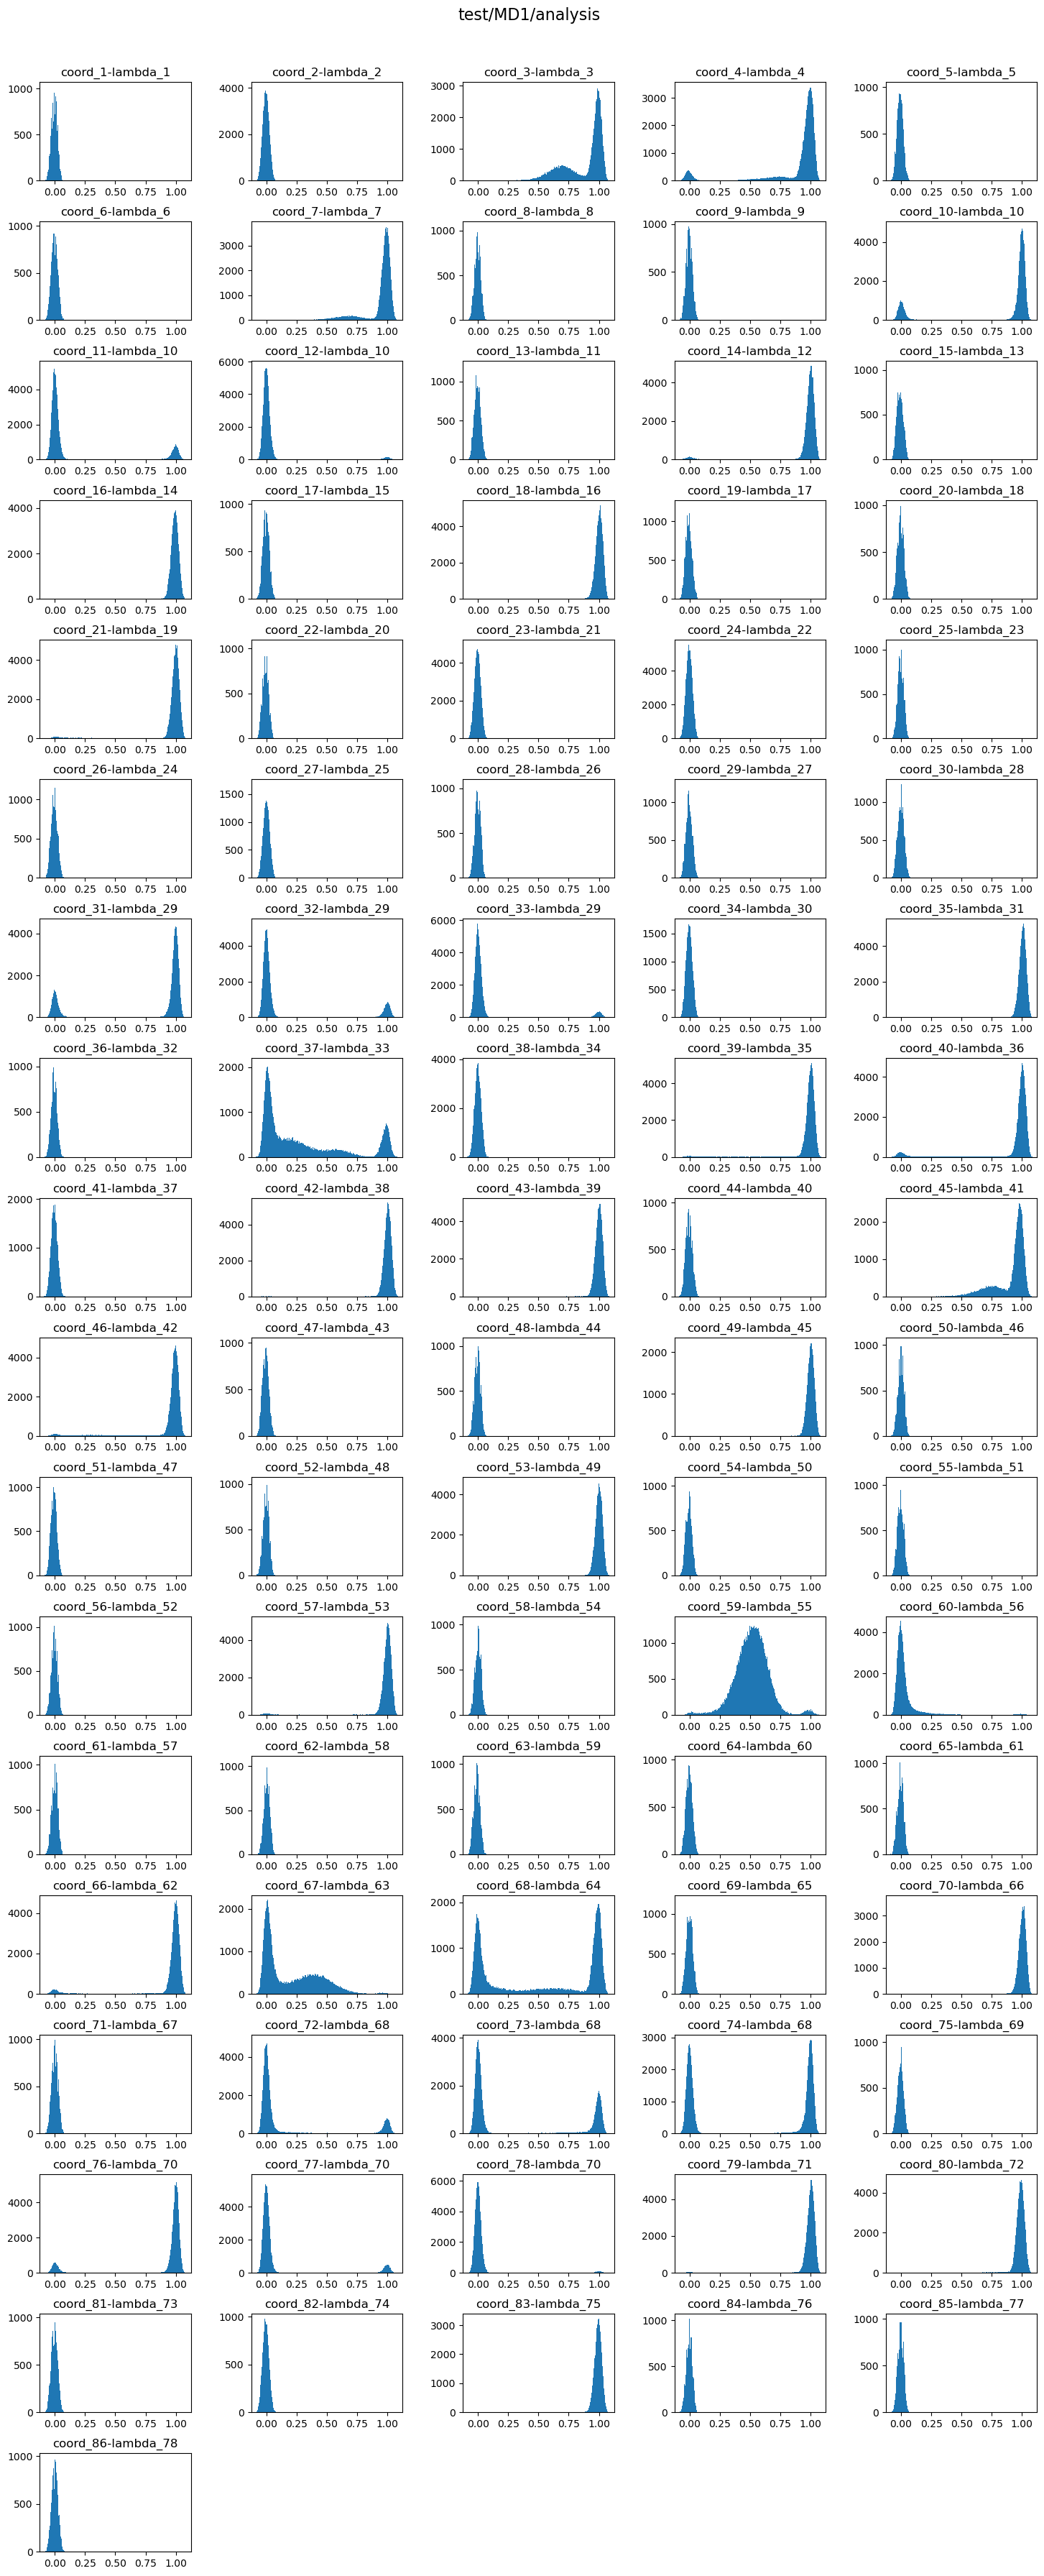

In [5]:
lambda_hist = plot_lambda_hist(PATH_ANALYSIS, xvg_data_md1, coord2lambda_dict, lambda_ref)
lambda_hist.show()

## Protonation fraction time series

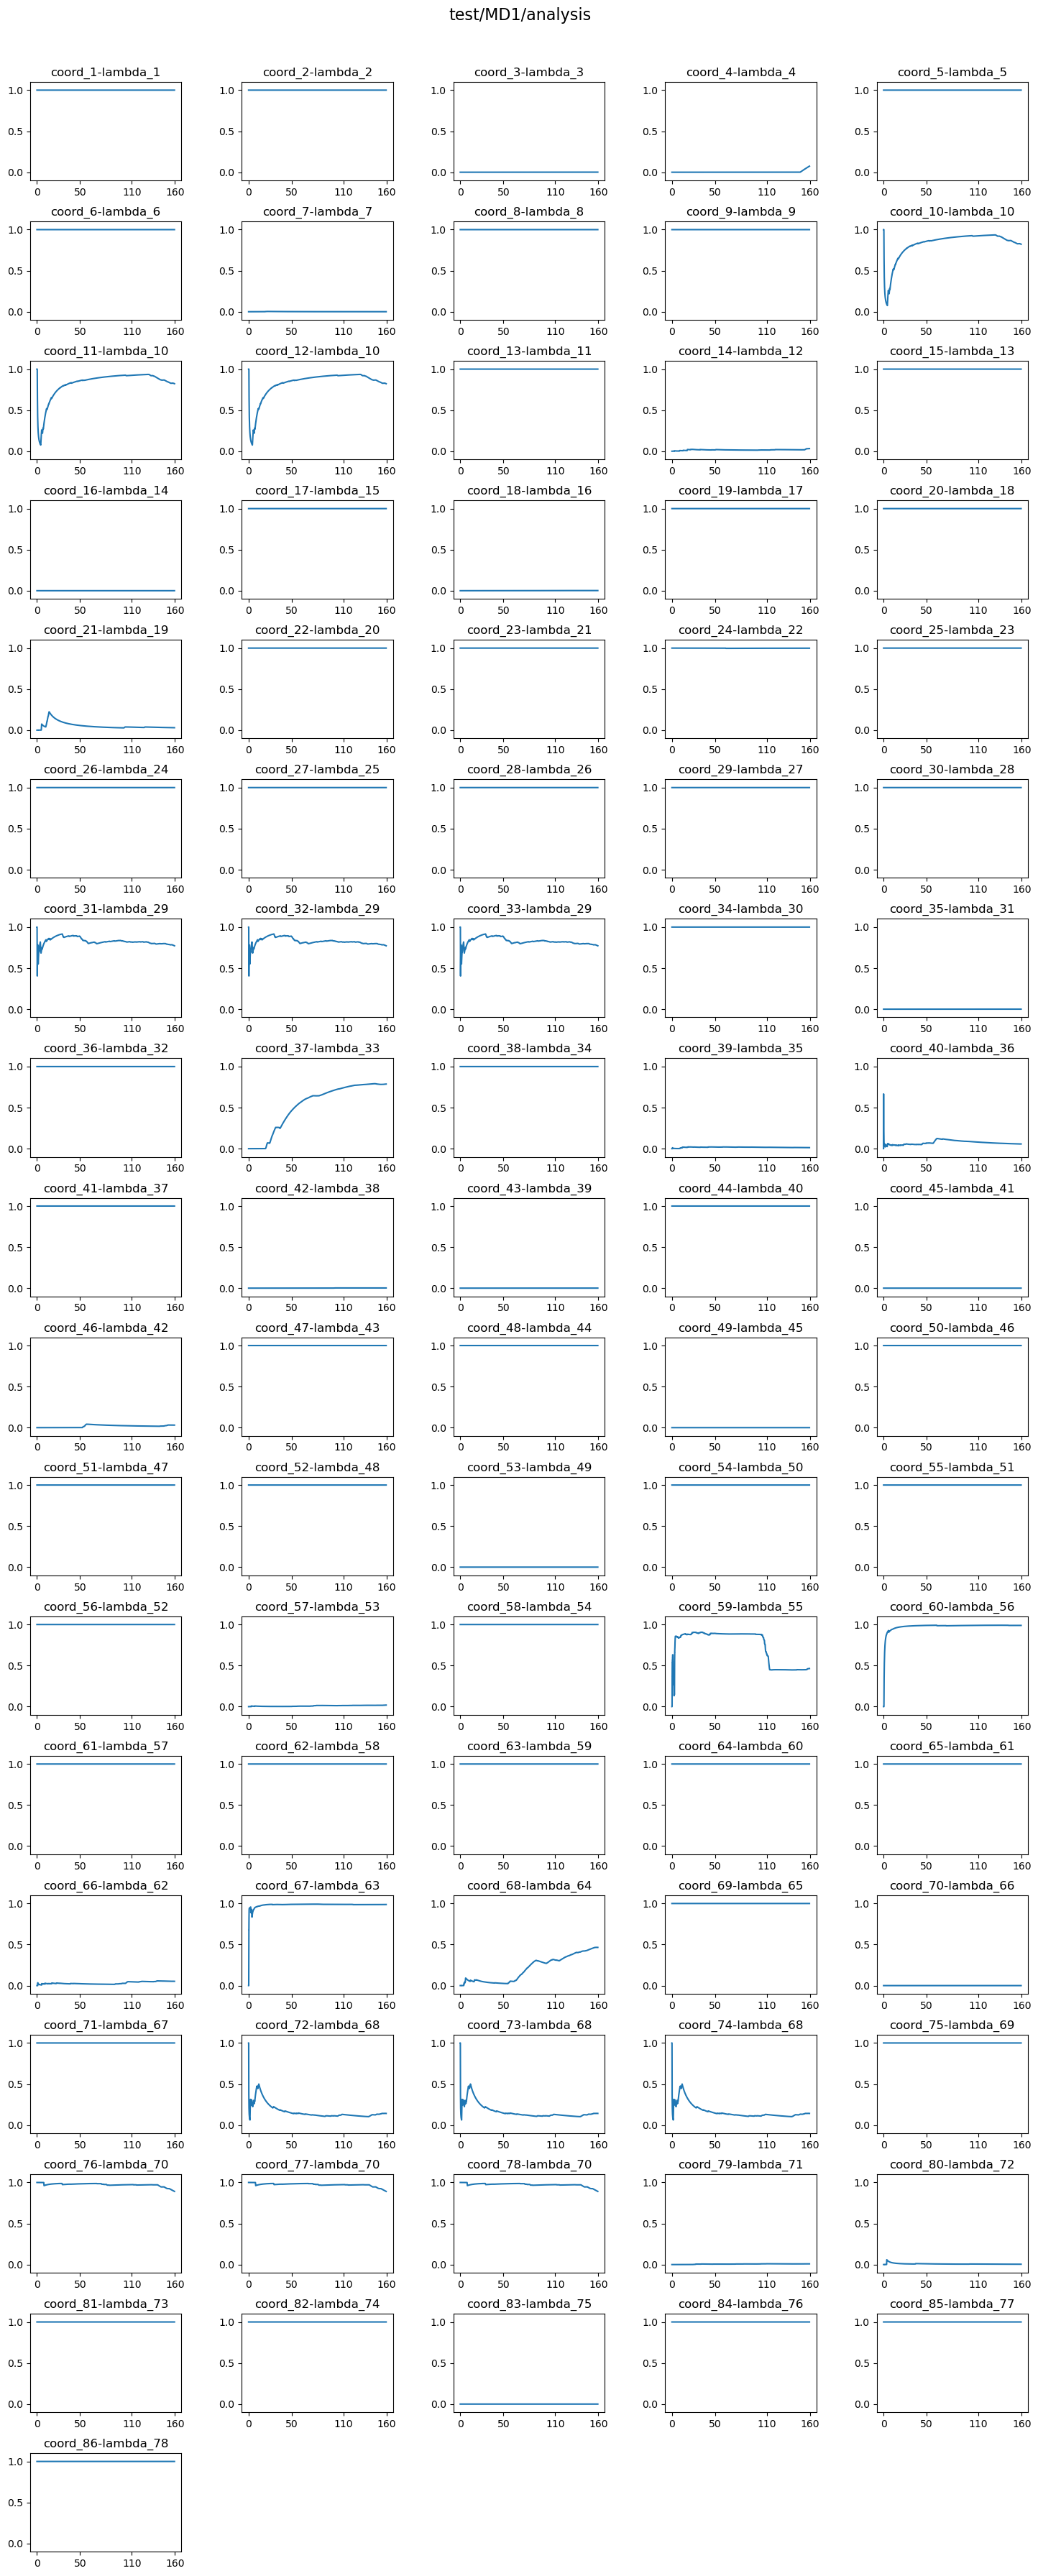

In [6]:
proton_ts = plot_protonation_timeseries(PATH_ANALYSIS, time_MD1, xvg_data_md1, coord2lambda_dict, lambda_ref)
proton_ts.show()

# MD1 - MD1_2

In [7]:
PATH_ANALYSIS = ["test/MD1/analysis", "test/MD1_2/analysis"]

## Check overall convergence between replicas
Just two replicas supported - add get_protfrac_ts if more than 2


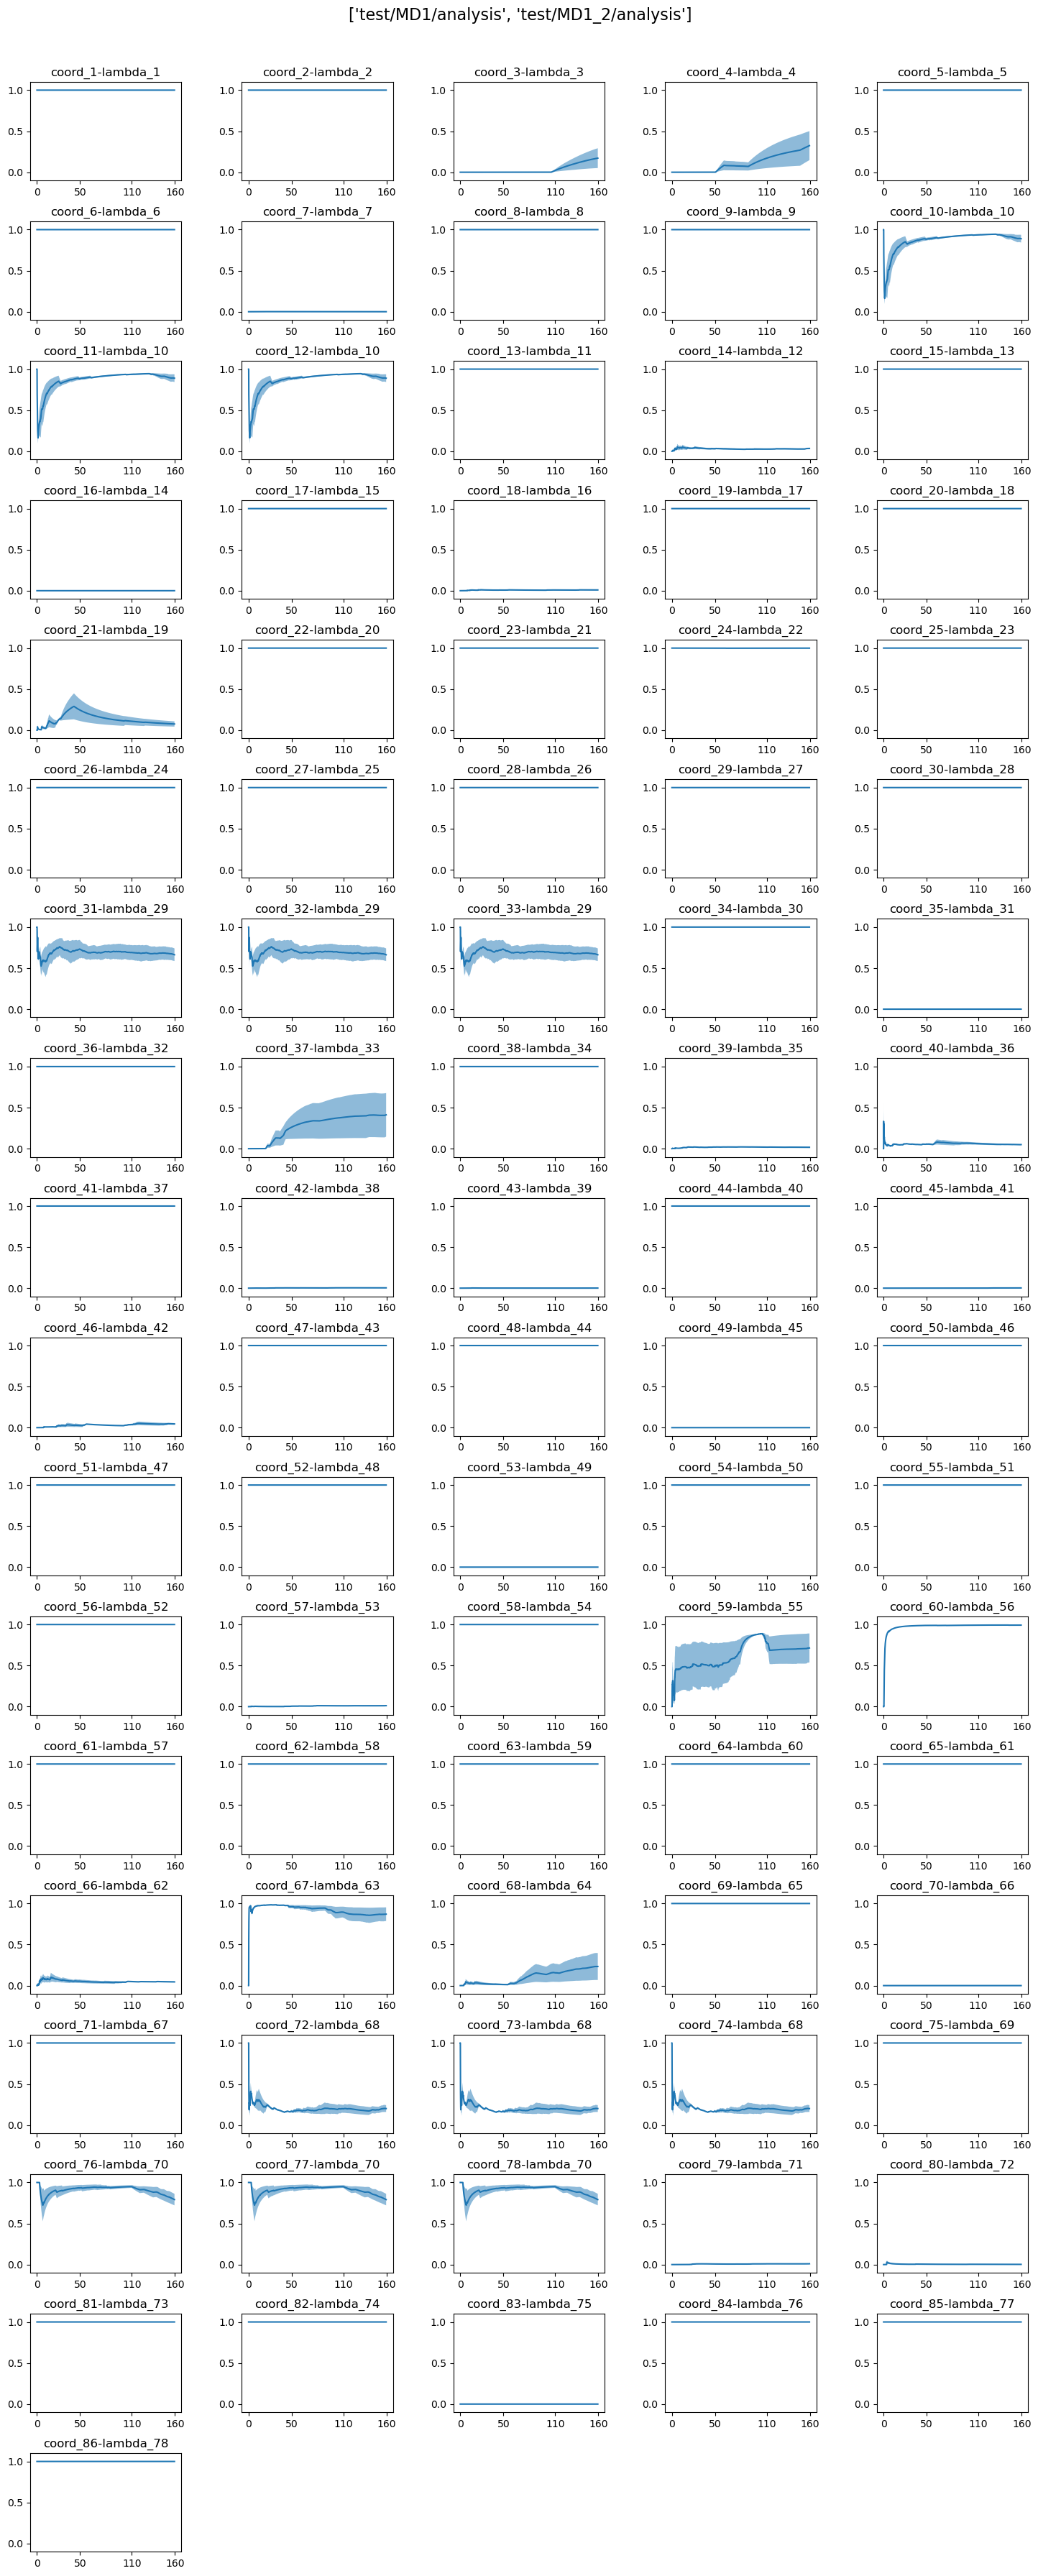

In [8]:
proton_conv = plot_protonation_convergence(PATH_ANALYSIS, time_MDs, [xvg_data_md1, xvg_data_md2], coord2lambda_dict, lambda_ref)
proton_conv.show()

## Check overall protonation fractions

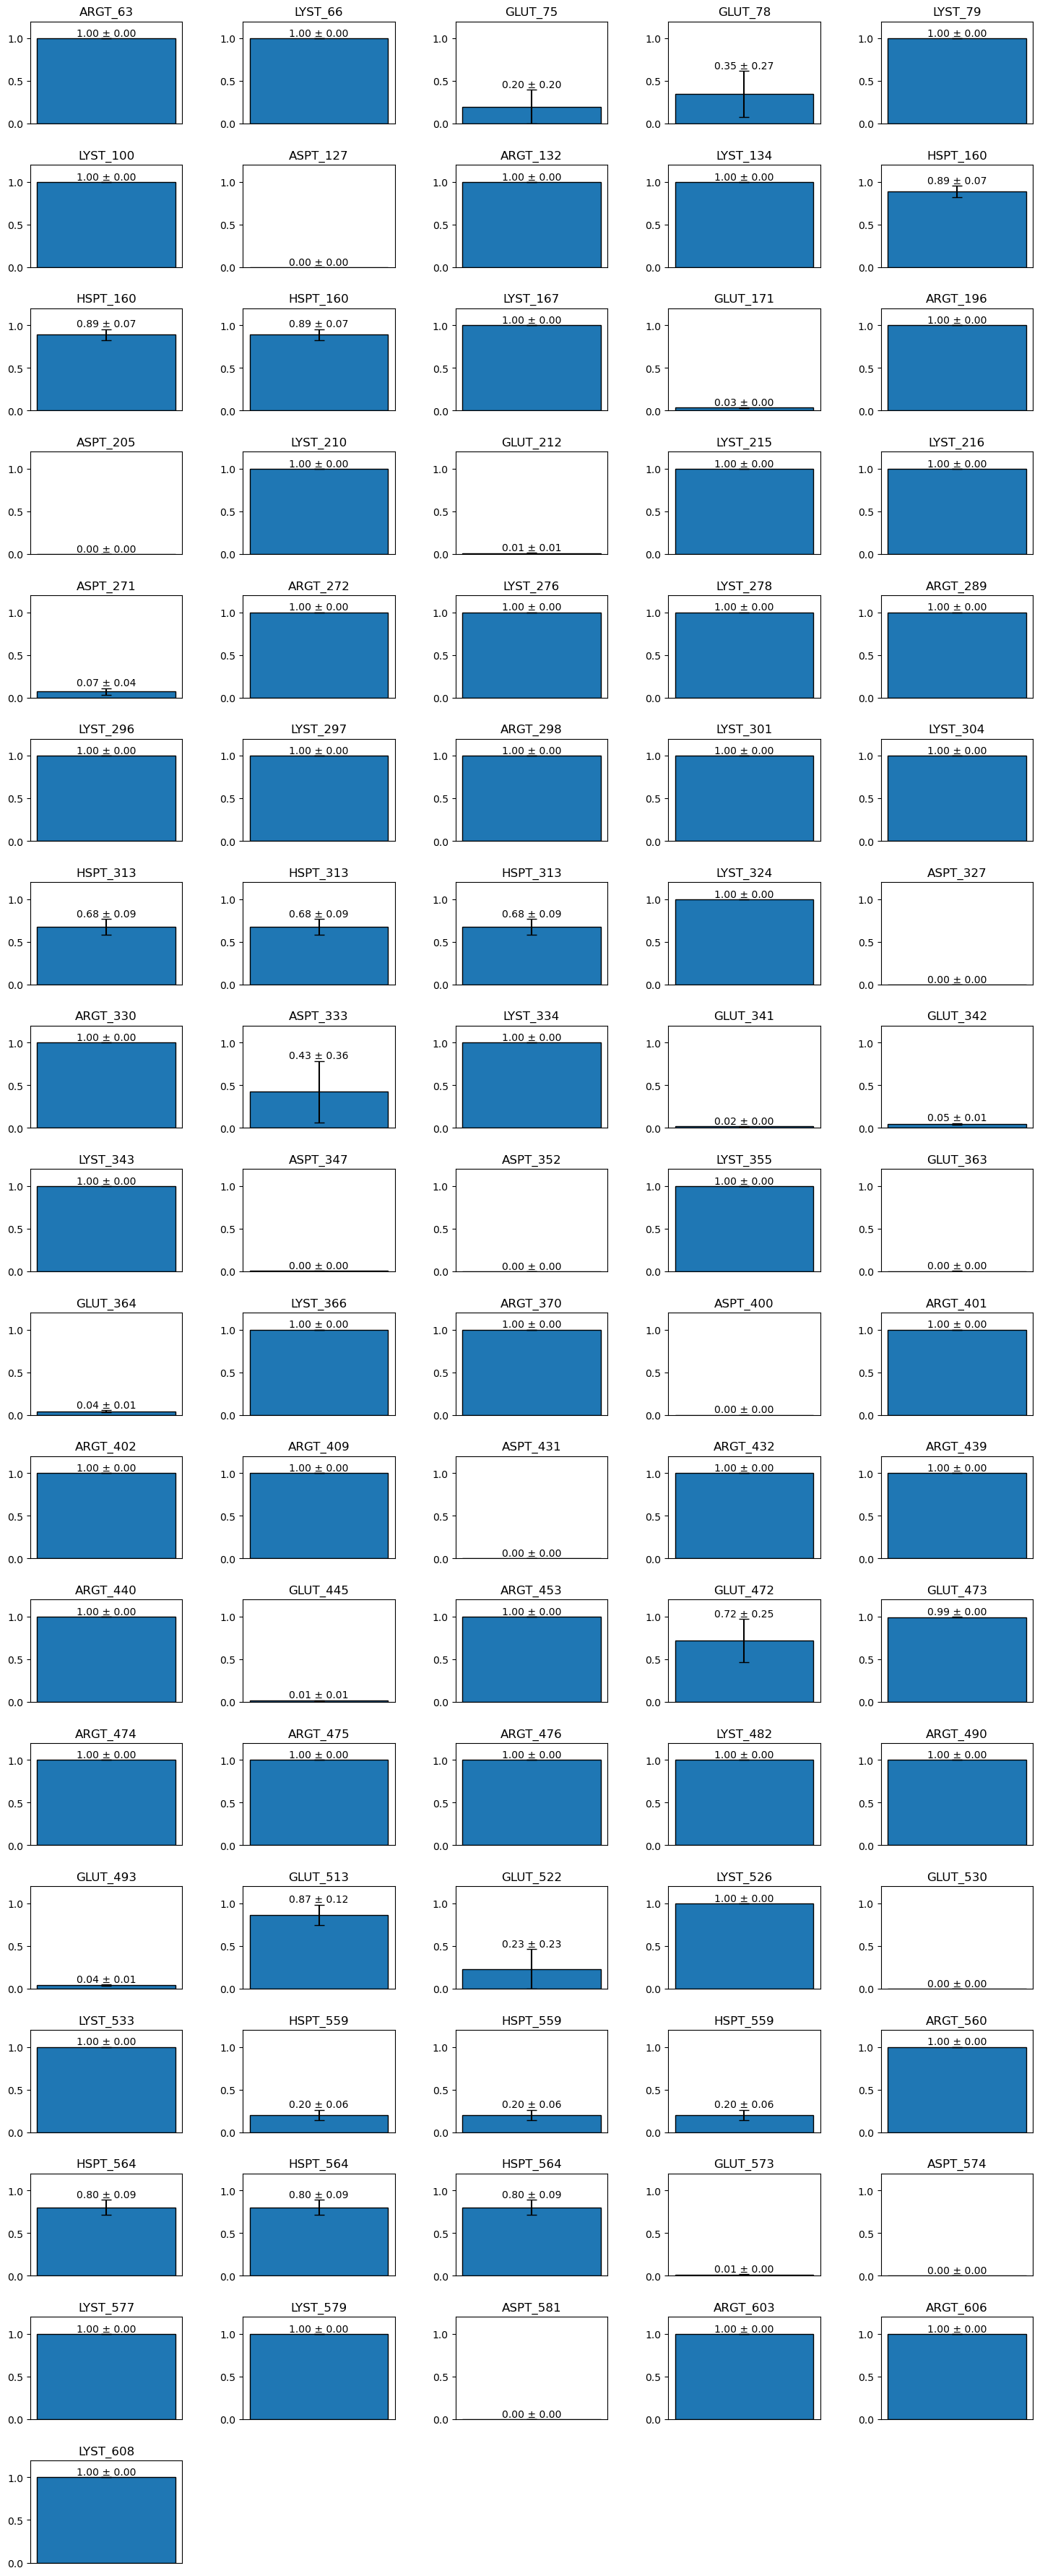

In [9]:
proton_frac = plot_protonation_fraction([xvg_data_md1, xvg_data_md2], lambda_ref)
proton_frac.show()

## Single residue protonation convergence

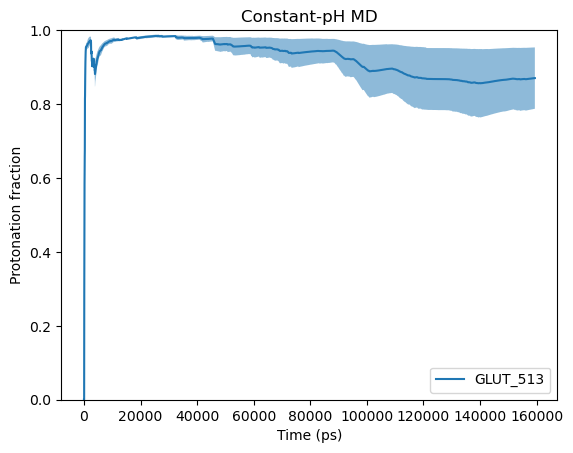

In [12]:
res67_conv = single_residue_convergence(int(67), [xvg_data_md1, xvg_data_md2], lambda_ref)
res67_conv.show()